# Global Map Features Scraping Notebook

Creator: Brian Au, HKUST QFIN
This project is created based on OpenStreetMap, and is used to facilitate equity research by allowing analysts to download features such as:

1) Number of convenience stores in Kwun Tong District (centered in town centre with radius = 1000m) as a pandas dataframe
2) Distribution (as map with plots) as a mpl figure.

for industry competition research, forming a basis of investment research and as a competitive edge in terms of alternative datasource.

### User guide

**Breakdown of feature CLASSIFICATION**

**Common facilities search**


1. **amenity**: Essential services & facilities
   *   *typical names:* `['restaurant', 'cafe', 'school', 'bank', 'pharmacy', 'parking', 'toilets']`
2. **shop**: Retail locations and stores
   *   *typical names:* `['convenience', 'supermarket', 'clothes', 'bakery', 'electronics', 'mall']`
3. **leisure**: Recreation and entertainment
   *   *typical names:* `['park', 'playground', 'pitch', 'swimming_pool', 'garden', 'sports_centre']`
4. **tourism**: Tourist attractions and hospitality
   *   *typical names:* `['hotel', 'museum', 'attraction', 'viewpoint', 'hostel', 'information']`

**Infrastructure search**


5. **building**: Physical building structures
   *   *typical names:* `['apartments', 'residential', 'commercial', 'office', 'industrial']`
6. **highway**: Roads, paths, and street furniture
   *   *typical names:* `['bus_stop', 'crossing', 'street_lamp', 'traffic_signals', 'primary', 'residential']`
7. **public_transport**: Transit infrastructure
   *   *typical names:* `['station', 'stop_position', 'platform']`

**Land & Nature search**
8. **landuse**: Primary use of land area (zoning)
   *   *typical names:* `['residential', 'commercial', 'industrial', 'retail', 'grass', 'construction']`
9. **natural**: Physical landscape features
   *   *typical names:* `['water', 'wood', 'tree', 'beach', 'peak']`

**Usage in function:**
```python
# usage: osm_features(place, classification, feature_name)
# Example: Find all 7-Elevens/Circle Ks (amenity -> convenience is mostly shop -> convenience)
gdf = osm_features('Tseung Kwan O, Sai Kung, Hong Kong', 'shop', 'convenience')
```

In [1]:
from OSM1 import *
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 10) # Only shows 10 rows

### osm_features

This function gets parameters:

1) place name
2) map feature classification such as: amenity, leisure
3) feature name such as: convenience store
4) optional: radius from centre

and gives a dataframe of all the identified matching features within that region.

### Usage on map search

In [2]:
osm_features('Tseung Kwan O, Sai Kung, Hong Kong','amenity','school',radius=2000)

geometry  \
element id                                                              
node    6683912829                           POINT (114.25781 22.321)   
        7331032617                         POINT (114.25243 22.30658)   
        7331041196                         POINT (114.26404 22.31457)   
way     122737936   POLYGON ((114.23962 22.30083, 114.23985 22.300...   
        126688925   POLYGON ((114.26057 22.3101, 114.26029 22.3108...   
...                                                               ...   
        209834964   POLYGON ((114.24999 22.3044, 114.24975 22.3043...   
        209875644   POLYGON ((114.24955 22.30759, 114.24948 22.307...   
        209875652   POLYGON ((114.24981 22.30655, 114.2492 22.3067...   
        273527386   POLYGON ((114.25996 22.3256, 114.25921 22.3252...   
        402601142   POLYGON ((114.25794 22.30365, 114.25759 22.303...   

                                  addr:city              addr:housename  \
element id                                                                
node    6683912829        將軍澳 Tseung Kwan O  新都城廣場1期 Metro City Phase 1   
        7331032617            Tseung Kwan O   Choi Ming Shopping Centre   
        7331041196  Hang Hau, Tseung Kwan O             Nan Fung Plaza,   
way     122737936                       NaN                         NaN   
        126688925                       NaN                         NaN   
...                                     ...                         ...   
        209834964                       NaN                         NaN   
        209875644                       NaN                         NaN   
        209875652                       NaN                         NaN   
        273527386                       NaN                         NaN   
        402601142                       NaN                         NaN   

                       addr:housenumber           addr:street amenity  \
element id                                                              
node    6683912829                    1     運亨路 Wan Hang Road  school   
        7331032617       Shop 307C, 3/F    1 Choi Ming Street  school   
        7331041196  Shop A16 & A30, G/F                   培成路  school   
way     122737936                   NaN                   NaN  school   
        126688925                     1  唐俊街 Tong Chun Street  school   
...                                 ...                   ...     ...   
        209834964                     4      勤學里 Kan Hok Lane  school   
        209875644                    38    翠嶺路 Chui Ling Road  school   
        209875652                     1      勤學里 Kan Hok Lane  school   
        273527386                     2     敬賢里 King Yin Lane  school   
        402601142                    28   唐賢街 Tong Yin Street  school   

                                  brand        brand:en brand:wikidata  \
element id                                                               
node    6683912829  遵理學校 Beacon College  Beacon College      Q28408488   
        7331032617                  NaN             NaN            NaN   
        7331041196                  NaN             NaN            NaN   
way     122737936                   NaN             NaN            NaN   
        126688925                   NaN             NaN            NaN   
...                                 ...             ...            ...   
        209834964                   NaN             NaN            NaN   
        209875644                   NaN             NaN            NaN   
        209875652                   NaN             NaN            NaN   
        273527386                   NaN             NaN            NaN   
        402601142                   NaN             NaN            NaN   

                   brand:zh  ... addr:city:zh addr:street:en addr:street:zh  \
element id                   ...                                              
node    6683912829     遵理學校  ...          NaN            NaN    

### Usage on Operator/Company Facility Search

It is known that OSM is NOT PRIMARILY DESIGNED FOR COMPANY-SPECIFIC seach and the data is incomplete and fragile.
Since company names (operator feature names) are very unstable, it is optimal to use a two-layer query for the company-specific facilities

In [3]:
gdf_malls = osm_features('Hong Kong','shop','mall',radius=10000)

In [4]:
gdf_malls

geometry  \
element id                                                              
node    297188947                          POINT (114.17301 22.27729)   
        324615589                          POINT (114.17109 22.31852)   
        1276554385                         POINT (114.17014 22.31762)   
        1280226918                         POINT (114.17051 22.31735)   
        1927712349                         POINT (114.18475 22.28093)   
...                                                               ...   
way     1359636108  POLYGON ((114.13787 22.33765, 114.13837 22.337...   
        1359637281  POLYGON ((114.14052 22.33655, 114.14082 22.336...   
        1381619181  POLYGON ((114.17463 22.29388, 114.17432 22.293...   
        1415166820  POLYGON ((114.16056 22.30514, 114.16067 22.305...   
        1445402642  POLYGON ((114.1694 22.29496, 114.16949 22.2945...   

                   addr:housenumber             addr:street    addr:street:en  \
element id                                                                      
node    297188947           130-138      軒尼詩道 Hennessy Road     Hennessy Road   
        324615589               NaN                     NaN               NaN   
        1276554385              NaN                     NaN               NaN   
        1280226918              NaN                     NaN               NaN   
        1927712349            24-26     東角道 East Point Road               NaN   
...                             ...                     ...               ...   
way     1359636108              NaN                     NaN               NaN   
        1359637281              NaN                     NaN               NaN   
        1381619181               18    梳士巴利道 Salisbury Road    Salisbury Road   
        1415166820                1  柯士甸道西 Austin Road West  Austin Road West   
        1445402642            3--27         廣東道 Canton Road       Canton Road   

                   addr:street:zh        addr:suburb addr:suburb:en  \
element id                                                            
node    297188947            軒尼詩道        灣仔 Wan Chai       Wan Chai   
        324615589             NaN                NaN            NaN   
        1276554385            NaN                NaN            NaN   
        1280226918            NaN                NaN            NaN   
        1927712349            NaN                NaN            NaN   
...                           ...                ...            ...   
way     1359636108            NaN                NaN            NaN   
        1359637281            NaN                NaN            NaN   
        1381619181          梳士巴利道                NaN            NaN   
        1415166820          柯士甸道西                NaN            NaN   
        1445402642            廣東道  尖沙咀 Tsim Sha Tsui  Tsim Sha Tsui   

                   addr:suburb:zh      mall  \
element id                                    
node    297188947              灣仔  computer   
        324615589             NaN       NaN   
        1276554385            NaN       NaN   
        1280226918            NaN       NaN   
        1927712349            NaN       NaN   
...                           ...       ...   
way     1359636108            NaN       NaN   
        1359637281            NaN       NaN   
        1381619181            NaN       NaN   
        1415166820            NaN       NaN   
        1445402642            尖沙咀       NaN   

                                                                 name  ...  \
element id                                                             ...   
node    297188947                       灣仔電腦城 Wanchai Computer Center  ...   
        324615589                     旺角電腦中心 Mong Kok Computer Centre  ...   
        1276554385                                      星際城市 Sim City  ...   
        1280226918                  荷李活購物中心 Hollywood Shopping Centre  ...   
        1927712349                                   

In [5]:
link_owned_malls = gdf_malls[gdf_malls['owner'].str.contains('Link', case=False, na=False)]
link_owned_malls

,,geometry,addr:housenumber,addr:street,addr:street:en,addr:street:zh,addr:suburb,addr:suburb:en,addr:suburb:zh,mall,name,...,cinema,mall:area,loading_dock,noaddress,education,no:name:zh,dog,garden,pets,terrace
element,id,,,,,,,,,,,,,,,,,,,,,
relation,12289919,"MULTIPOLYGON (((114.17157 22.36272, 114.17149 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,顯徑商場 Hin Keng Shopping Centre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way,225413284,"POLYGON ((114.20908 22.21902, 114.2091 22.2189...",23,佳美道 Carmel Road,Carmel Road,佳美道,赤柱 Stanley,Stanley,赤柱,NaN,赤柱廣場 Stanley Plaza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### osm_road_network

This function gets in:

1) the place name

and gives a plot of the road network of the place.

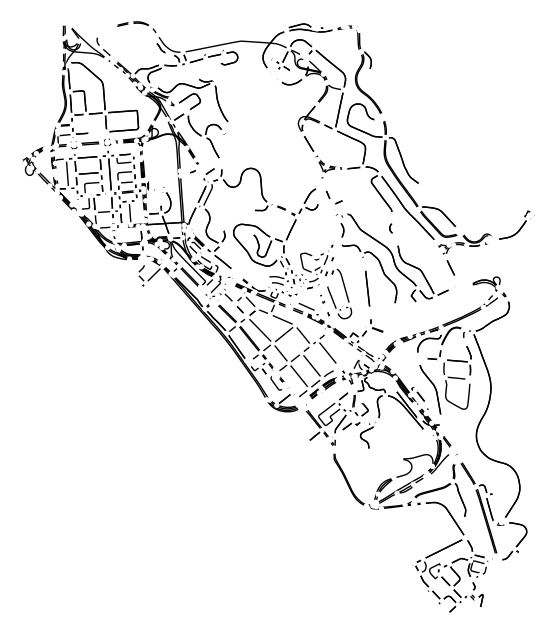

{'n': 904,
 'm': 1677,
 'k_avg': 3.7101769911504423,
 'edge_length_total': 203299.29934677543,
 'edge_length_avg': 121.22796621751665,
 'streets_per_node_avg': 2.9878318584070795,
 'streets_per_node_counts': {0: 0, 1: 59, 2: 22, 3: 696, 4: 126, 5: 0, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.06526548672566372,
  2: 0.024336283185840708,
  3: 0.7699115044247787,
  4: 0.13938053097345132,
  5: 0.0,
  6: 0.0011061946902654867},
 'intersection_count': 845,
 'street_length_total': 155040.61189433365,
 'street_segment_count': 1332,
 'street_length_avg': 116.39685577652676,
 'circuity_avg': 1.105005364351672,
 'self_loop_proportion': 0.0037537537537537537}

In [6]:
osm_road_network('Kwun Tong District')

### osm_features_plot

This function gets:

1) place name
2) feature classification
3) feature name
4) optional: radius of search from centre

and gives a plot of the map with features specified.

enhanced version is improved for effective plotting and eliminating prior error.

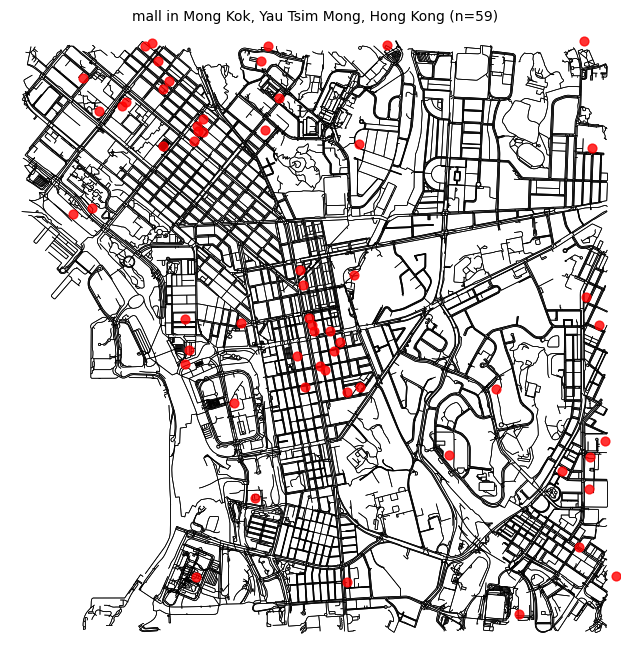

In [7]:
osm_features_plot_enhanced('Mong Kok, Yau Tsim Mong, Hong Kong', classification='shop',feature_name='mall',radius=2000)

### features_count_comparison

In [8]:
df = features_count_comparison(['Mong Kok, Yau Tsim Mong, Hong Kong', 'Tseung Kwan O, Sai Kung, Hong Kong',
                           'Central, Central and Western District, Hong Kong'],'shop','mall',radius=2000)

In [9]:
df

Mong Kok, Yau Tsim Mong, Hong Kong                  59
Tseung Kwan O, Sai Kung, Hong Kong                  39
Central, Central and Western District, Hong Kong    39
dtype: int64

In [10]:
osm_features('Mong Kok, Yau Tsim Mong, Hong Kong','shop','mall',radius=2000)

geometry  \
element id                                                              
node    324615589                          POINT (114.17109 22.31852)   
        1276554385                         POINT (114.17014 22.31762)   
        1280226918                         POINT (114.17051 22.31735)   
        3008675289                         POINT (114.18735 22.30647)   
        3230266813                         POINT (114.16964 22.32013)   
...                                                               ...   
way     758720819   POLYGON ((114.15991 22.33535, 114.1598 22.3354...   
        923131807   POLYGON ((114.18881 22.31316, 114.18871 22.312...   
        1012337017  POLYGON ((114.16719 22.33694, 114.16702 22.336...   
        1294908666  POLYGON ((114.18831 22.31055, 114.1883 22.3100...   
        1415166820  POLYGON ((114.16056 22.30514, 114.16067 22.305...   

                                                                 name  \
element id                                                              
node    324615589                     旺角電腦中心 Mong Kok Computer Centre   
        1276554385                                      星際城市 Sim City   
        1280226918                  荷李活購物中心 Hollywood Shopping Centre   
        3008675289                                      Planet Square   
        3230266813                      旺角中心第一座 Argyle Centre Phase I   
...                                                               ...   
way     758720819                                  天悅廣場 Smiling Plaza   
        923131807                                      Soda Mall 首達百貨   
        1012337017  白田商場（第十一期） Pak Tin Commercial Centre (under Ph...   
        1294908666                               紅磡廣場 Hung Hom Square   
        1415166820                                        圓方 Elements   

                                      name:en  name:zh  shop  \
element id                                                     
node    324615589    Mong Kok Computer Centre   旺角電腦中心  mall   
        1276554385                   Sim City     星際城市  mall   
        1280226918  Hollywood Shopping Centre  荷李活購物中心  mall   
        3008675289                        NaN      NaN  mall   
        3230266813      Argyle Centre Phase I  旺角中心第一座  mall   
...                                       ...      ...   ...   
way     758720819               Smiling Plaza     天悅廣場  mall   
        923131807                   Soda Mall     首達百貨  mall   
        1012337017  Pak Tin Commercial Centre     白田商場  mall   
        1294908666            Hung Hom Square     紅磡廣場  mall   
        1415166820                   Elements       圓方  mall   

                                     website   wikidata  \
element id                                                
node    324615589   http://www.mongkokcc.com  Q10314168   
        1276554385                       NaN        NaN   
        1280226918                       NaN        NaN   
        3008675289                       NaN        NaN   
        3230266813                       NaN        NaN   
...                                      ...        ...   
way     758720819                        NaN        NaN   
        923131807                        NaN        NaN   
        1012337017                       NaN        NaN   
        1294908666                       NaN  Q15936176   
        1415166820                       NaN   Q5358920   

                                   wikimedia_commons  wikipedia  \
element id                                                        
node    324615589   Category:Mongkok Computer Centre  zh:旺角電腦中心   
        1276554385                               NaN        NaN   
        1280226918                               NaN        NaN   
        3008675289                               NaN        NaN   
        3230266813                               NaN        NaN   
...                                              ...        ...   
way     758720819       